# Dallas Bueckert

## Research question/interestsHow does a game's genre affect the rating people give it on the steam store.

In [2]:
import pandas as pd
df = pd.read_csv('../data/raw/steam.csv')
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


# Milestone 3:

## Task 1: EDA

In [6]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
%matplotlib inline


print("The number of rows and columns:")
print(df.shape)
print("All of the categories:")
print(df.columns)

The number of rows and columns:


NameError: name 'df' is not defined

In [4]:
df.describe(include='int')

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000


###### 98.1% of games uploaded to steam during this time had english as a language.
###### 25% of games only have 6 positive ratings or less, half of all games have 24 positive ratingas or less, and 75% of all games only have 126 positive ratings or less. Very few games are very or even moderatley succesfull.
###### 75% of games have an average of 0 hrs played while the mean is around 150hrs, showing that some games are played significantly more than others. Even though there is a skew of the mean given the max average playtime is 190625 the mean median is still close at 146hrs.

In [5]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
price,27075.0,6.078193,7.874922,0.0,1.69,3.99,7.19,421.99


###### 75% of the games cost $7.19 USD or less, I wonder if this correlates with positive ratings?

In [119]:
df.describe(include='object')

,name,release_date,developer,publisher,platforms,categories,genres,steamspy_tags,owners
count,27075,27075,27075,27075,27075,27075,27075,27075,27075
unique,27033,2619,17113,14354,7,3333,1552,6423,13
top,Dark Matter,2018-07-13,Choice of Games,Big Fish Games,windows,Single-player,Action;Indie,Action;Indie;Casual,0-20000
freq,3,64,94,212,18398,6110,1852,845,18596


###### There are 1552 unique genres here but I will probably only use the top 10 for my research question. I can also probably use the top 10 categories as they are similar enough to genres.

## Task 2-3: Set up an Analysis Pipeline by using Method Chaining and writing Python programs

### Load in unproccessed data:

In [4]:
df = pd.read_csv('../data/raw/steam.csv')
df.groupby("genres").mean()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
genres,,,,,,,,,
Accounting;Animation & Modeling;Audio Production;Design & Illustration;Education;Photo Editing;Software Training;Utilities;Video Production;Web Publishing,520210.000000,1.000000,0.000000,0.000000,5.000000,7.000000,0.000000,0.000000,11.390000
Accounting;Education;Software Training;Utilities;Early Access,551960.000000,1.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000
Action,411185.646501,0.996441,1.890866,24.202847,3611.361803,639.671412,263.297746,189.072361,9.981174
Action;Adventure,422856.336088,0.991736,2.942149,19.316804,5558.873278,1381.374656,318.327824,295.140496,12.245427
Action;Adventure;Casual,606874.237288,0.966102,0.000000,18.220339,523.525424,59.949153,44.610169,27.966102,4.949661
...,...,...,...,...,...,...,...,...,...
Violent;Simulation;Early Access,888250.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.790000
Violent;Simulation;Sports,510510.000000,1.000000,16.000000,59.000000,793.000000,537.000000,0.000000,0.000000,39.990000
Violent;Sports,543010.000000,1.000000,16.000000,22.000000,127.000000,69.000000,0.000000,0.000000,8.990000


### Load in unprocessed data and clean, process, and wrangle it:

In [95]:
#TODO:
#Add a column that is a ratio of positive to negative reviews *done*
#Clean results that don't have enough players *done*
#Get rid of enough values to make nice graph
#Do a graph comparing Genre and reviews
#Do a graph with tags and reviews
#Seperate genre into single categories? *done*
#df1 = df1.sort_values(by=['genres','negative_ratings'])
df1['genres'].value_counts()

Action;Indie                                                             1852
Casual;Indie                                                             1482
Action;Adventure;Indie                                                   1229
Adventure;Indie                                                          1170
Action;Casual;Indie                                                      1004
                                                                         ... 
Sexual Content;Violent;Gore;Action;Casual;Free to Play;Indie;Strategy       1
Nudity;Violent;Gore;Adventure;Indie;RPG;Early Access                        1
Violent;Action;Adventure;Casual;Indie;RPG;Early Access                      1
Indie;Simulation;Web Publishing                                             1
Casual;Free to Play;Massively Multiplayer;RPG;Early Access                  1
Name: genres, Length: 1552, dtype: int64

In [1]:
import pandas as pd
import numpy as np
import project_functions3 as p3
dfb = p3.clean_and_process('../data/raw/steam.csv')
dfb = p3.remove_low_performers(dfb)
dfb

,Category,Genre,Tags,Positive Reviews,Negative Reviews,Copies Sold,Positive Percentage
0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,124534,3339,10000000-20000000,0.973888
1,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,3318,633,5000000-10000000,0.839787
2,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,3416,398,5000000-10000000,0.895648
3,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,1273,267,5000000-10000000,0.826623
4,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,5250,288,5000000-10000000,0.947996
...,...,...,...,...,...,...,...
8474,Online Multi-Player;In-App Purchases,Action;Free to Play;Indie;Massively Multiplaye...,Early Access;Free to Play;Action,256,141,100000-200000,0.644836
8475,Online Multi-Player;Steam Achievements;Full co...,Action;Free to Play;Strategy,Free to Play;Strategy;Action,52,29,20000-50000,0.641975
8476,Single-player,Adventure;Free to Play;Indie,Free to Play;Adventure;Indie,689,78,50000-100000,0.898305
8477,Single-player;Multi-player;Online Multi-Player,Action;Free to Play,Free to Play;Action;Multiplayer,74,20,20000-50000,0.787234


In [2]:
dfc = p3.genre_group(dfb)
dfc

,Category,Genre,Tags,Positive Reviews,Negative Reviews,Copies Sold,Positive Percentage
0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,124534,3339,10000000-20000000,0.973888
1,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,3318,633,5000000-10000000,0.839787
2,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,3416,398,5000000-10000000,0.895648
3,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,1273,267,5000000-10000000,0.826623
4,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,5250,288,5000000-10000000,0.947996
...,...,...,...,...,...,...,...
22686,Single-player;Partial Controller Support,Adventure,RPG;Indie;Adventure,101,29,20000-50000,0.776923
22687,Single-player;Partial Controller Support,Free to Play,RPG;Indie;Adventure,101,29,20000-50000,0.776923
22688,Single-player;Partial Controller Support,Indie,RPG;Indie;Adventure,101,29,20000-50000,0.776923
22689,Single-player;Partial Controller Support,RPG,RPG;Indie;Adventure,101,29,20000-50000,0.776923


In [19]:
dfb.describe(percentiles=[.01, .2, .99],include='float64').T

,count,mean,std,min,1%,20%,50%,99%,max
Positive Percentage,8479.0,0.731073,0.176611,0.0,0.242438,0.583239,0.767745,0.974647,1.0


In [3]:
dfc['Genre'].value_counts()

Indie                    5277
Action                   3870
Adventure                3083
Casual                   2355
Strategy                 1890
RPG                      1611
Simulation               1483
Free to Play             1188
Early Access              472
Massively Multiplayer     417
Racing                    321
Sports                    302
Violent                   156
Gore                      110
Nudity                     83
Sexual Content             73
Name: Genre, dtype: int64

In [4]:
dfd= p3.tags_group(dfb)
dfd

,Category,Genre,Tags,Positive Reviews,Negative Reviews,Copies Sold,Positive Percentage
0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action,124534,3339,10000000-20000000,0.973888
1,Multi-player;Online Multi-Player;Local Multi-P...,Action,FPS,124534,3339,10000000-20000000,0.973888
2,Multi-player;Online Multi-Player;Local Multi-P...,Action,Multiplayer,124534,3339,10000000-20000000,0.973888
3,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action,3318,633,5000000-10000000,0.839787
4,Multi-player;Online Multi-Player;Local Multi-P...,Action,FPS,3318,633,5000000-10000000,0.839787
...,...,...,...,...,...,...,...
18132,Single-player;Multi-player;Online Multi-Player,Action;Free to Play,Action,74,20,20000-50000,0.787234
18133,Single-player;Multi-player;Online Multi-Player,Action;Free to Play,Multiplayer,74,20,20000-50000,0.787234
18134,Single-player;Partial Controller Support,Adventure;Free to Play;Indie;RPG;Strategy,RPG,101,29,20000-50000,0.776923
18135,Single-player;Partial Controller Support,Adventure;Free to Play;Indie;RPG;Strategy,Indie,101,29,20000-50000,0.776923


In [51]:
result2 = dfd.groupby('Tags').filter(lambda x : len(x) >= 200)
result2

,Category,Genre,Tags,Positive Reviews,Negative Reviews,Copies Sold,Positive Percentage
0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action,124534,3339,10000000-20000000,0.973888
1,Multi-player;Online Multi-Player;Local Multi-P...,Action,FPS,124534,3339,10000000-20000000,0.973888
2,Multi-player;Online Multi-Player;Local Multi-P...,Action,Multiplayer,124534,3339,10000000-20000000,0.973888
3,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action,3318,633,5000000-10000000,0.839787
4,Multi-player;Online Multi-Player;Local Multi-P...,Action,FPS,3318,633,5000000-10000000,0.839787
...,...,...,...,...,...,...,...
25093,Single-player;Multi-player;Online Multi-Player,Action;Free to Play,Action,74,20,20000-50000,0.787234
25094,Single-player;Multi-player;Online Multi-Player,Action;Free to Play,Multiplayer,74,20,20000-50000,0.787234
25095,Single-player;Partial Controller Support,Adventure;Free to Play;Indie;RPG;Strategy,RPG,101,29,20000-50000,0.776923
25096,Single-player;Partial Controller Support,Adventure;Free to Play;Indie;RPG;Strategy,Indie,101,29,20000-50000,0.776923


## Task 4: Conduct Analysis and Answer my Research Question:

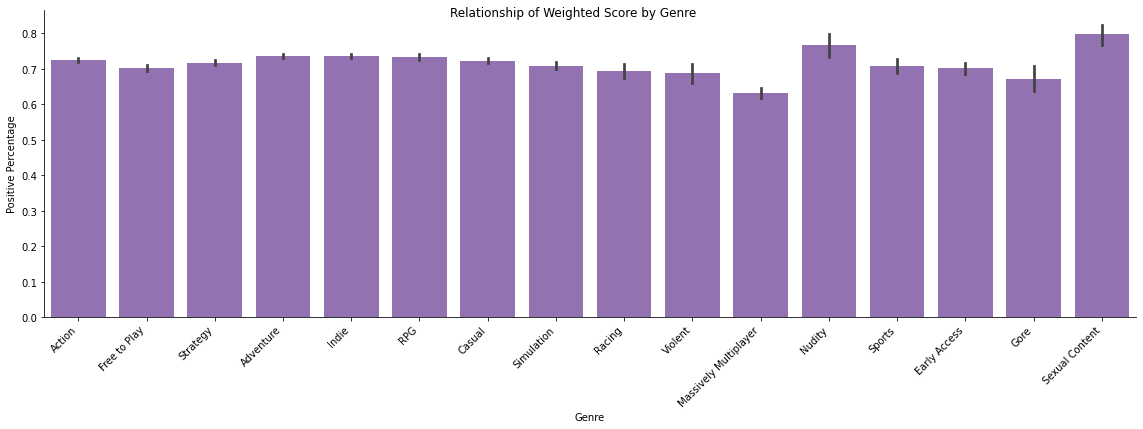

In [7]:
ax = sns.catplot(x="Genre",y="Positive Percentage",data = dfc,kind ="bar",color="tab:purple")
ax.fig.suptitle("Relationship of Genre to Percentage of Positive Review")
ax.fig.set_size_inches(20,5)
ax.set_xticklabels(rotation=45,horizontalalignment='right')
plt.show()

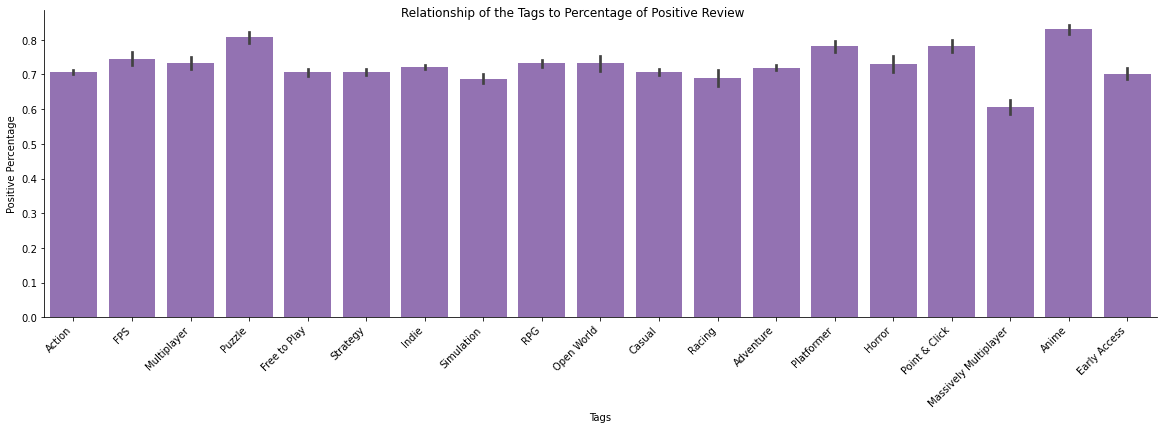

In [9]:
ax = sns.catplot(x="Tags",y="Positive Percentage",data = dfd,kind ="bar",color="tab:purple")
ax.fig.suptitle("Relationship of the Tags to Percentage of Positive Review")
ax.fig.set_size_inches(20,5)
ax.set_xticklabels(rotation=45,horizontalalignment='right')
plt.show()